![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='Green'>Dicas e Truques de Ciência de Dados</font>

## <font color='Grey'> Criando Agrupamentos e Fazendo Sumarizações </font>


![alt text](https://sab-astro.org.br/wp-content/uploads/2018/01/NO-GIRO-01.gif)




# AD - Arquitetura de Dados/ Dicionário de Dados

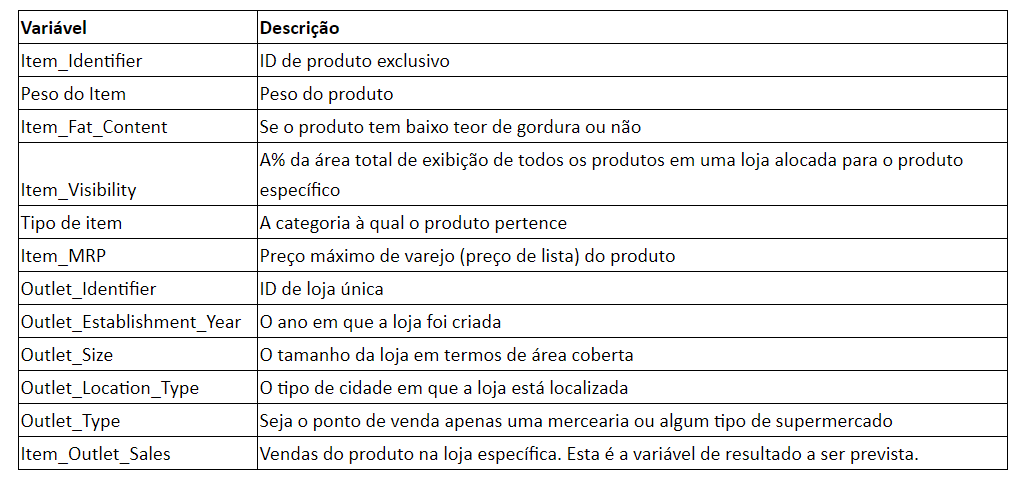

In [34]:
from PIL import Image
%matplotlib inline
im = Image.open("/content/AD.PNG")
im.show()
im

#Groupby - Agrupamentos

![alt text](https://media1.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif)

In [35]:
#import de bibliotecas
import pandas as pd
import numpy as np
df = pd.read_csv('/content/train_v9rqX0R.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
#cria o agrupamento pelo campo que vc escolheu
df.groupby('Outlet_Location_Type')

In [37]:
#cria uma contagem pelo agrupamento do campo que vc escolheu
df.groupby('Outlet_Location_Type').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
Outlet_Location_Type,,,,,,,,,,,
Tier 1,2388,1860,2388,2388,2388,2388,2388,2388,2388,2388,2388
Tier 2,2785,2785,2785,2785,2785,2785,2785,2785,930,2785,2785
Tier 3,3350,2415,3350,3350,3350,3350,3350,3350,2795,3350,3350


In [38]:
#cria o agrupamento com mais de 1 campo
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales']

In [39]:
#Sumarizo o agrupamento pelo campo de valor
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

#Split - Filtros

![alt text](https://miro.medium.com/max/4496/1*AqbrrUUlGNyJxaB0DNlFAA.gif)


In [40]:
#Cria dataset de teste
data = {'Gender':['m','f','f','m','f','m','m'],'Height':[172,171,169,173,170,175,178]}
df_sample = pd.DataFrame(data)
df_sample

,Gender,Height
0,m,172
1,f,171
2,f,169
3,m,173
4,f,170
5,m,175
6,m,178


In [ ]:
#Aplicando Filtro Simples
f_filter = df_sample['Gender']=='f'
print(df_sample[f_filter])



In [ ]:
m_filter = df_sample['Gender']=='m'
print(df_sample[m_filter])


In [53]:
#Aplicando a Média pelo Groupby
df_sample.groupby('Gender').median()

,Height
Gender,
f,170
m,174


In [54]:
#Agregação do Groupby com Numpy
obj = df.groupby('Outlet_Location_Type')
obj

In [55]:
# Funções do Objeto - Métodos
obj.groups

{'Tier 1': [0, 2, 10, 11, 12, 13, 15, 17, 23, 24, 29, 34, 35, 40, 42, 48, 49, 50, 57, 58, 59, 63, 69, 70, 74, 75, 76, 77, 80, 81, 83, 88, 89, 91, 95, 96, 99, 102, 108, 110, 112, 115, 126, 131, 135, 143, 145, 154, 163, 164, 178, 182, 186, 187, 189, 190, 191, 195, 196, 197, 204, 206, 208, 220, 222, 225, 227, 234, 236, 248, 250, 252, 255, 270, 274, 284, 289, 295, 297, 299, 301, 308, 311, 312, 321, 324, 334, 336, 344, 345, 346, 347, 348, 353, 354, 355, 356, 358, 361, 363, ...], 'Tier 2': [8, 9, 19, 22, 25, 26, 33, 46, 47, 53, 54, 56, 61, 66, 67, 68, 72, 73, 78, 79, 85, 86, 92, 93, 94, 97, 100, 107, 111, 114, 116, 117, 118, 120, 121, 123, 124, 125, 127, 129, 137, 138, 140, 141, 142, 144, 146, 147, 148, 149, 150, 157, 158, 165, 166, 170, 171, 176, 179, 181, 188, 192, 200, 201, 202, 207, 210, 211, 212, 213, 219, 221, 223, 228, 232, 233, 240, 241, 242, 243, 244, 245, 247, 249, 254, 256, 258, 259, 261, 262, 263, 264, 268, 273, 277, 281, 283, 285, 288, 290, ...], 'Tier 3': [1, 3, 4, 5, 6, 7, 14,

In [ ]:
#Filtrando com o "get_group"
obj.get_group('Tier 1')

In [58]:
#Agregando Pandas e Numpy - Estatísticas do Próprio campo
df.groupby('Outlet_Location_Type').agg([np.mean,np.median])

Item_Weight          ... Item_Outlet_Sales           
                            mean  median  ...              mean     median
Outlet_Location_Type                      ...                             
Tier 1                 12.892124  12.625  ...       1876.909159  1487.3972
Tier 2                 12.768628  12.500  ...       2323.990559  2004.0580
Tier 3                 12.933745  12.650  ...       2279.627651  1812.3076

[3 rows x 10 columns]

In [59]:
#Agregando Pandas e Numpy - Estatísticas de Outros Campos
df.groupby(['Outlet_Type','Item_Type']).agg(mean_MRP=('Item_MRP',np.mean),mean_Sales=('Item_Outlet_Sales',np.mean))

mean_MRP   mean_Sales
Outlet_Type       Item_Type                             
Grocery Store     Baking Goods   126.438068   292.082544
                  Breads         146.452873   381.967442
                  Breakfast      147.026989   412.831042
                  Canned         138.080808   352.864879
                  Dairy          147.166715   341.866589
...                                     ...          ...
Supermarket Type3 Others         106.779053  2700.928667
                  Seafood        124.028286  2687.073686
                  Snack Foods    144.574508  3745.168739
                  Soft Drinks    123.313587  3284.938836
                  Starchy Foods  143.078386  3512.190114

[64 rows x 2 columns]

#Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [33]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/8HUtX5MTRYg" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')